# *SOLUCIÓN DE LA ECUACIÓN DE COLEBROOK-WHITE, USANDO NEWTON-RAPHSON EN PYTHON.*

## A) DEMOSTRACIÓN GEOMÉTRICA.

![Geometria](https://user-images.githubusercontent.com/47722525/78464159-173f6980-76a3-11ea-8d8f-433922602437.png)

## B) FÓRMULA MATEMÁTICA.

![FormulaIterativa](https://user-images.githubusercontent.com/47722525/78464166-29210c80-76a3-11ea-963b-c8fed6841c5f.png)

## C) APLICACIÓN DE NEWTON-RAPHSON A LA HIDRÁULICA.

### <font color='blue'>EJEMPLO 1.- SOLUCIÓN DE LA ECUACIÓN DE COLEBROOK-WHITE.</font>

### _Encuentre el coeficiente de fricción en una tuberia de PVC usando la ecuación de Colebrook-White si se tiene un número de Reynolds de 312725.502, una rugosidad absoluta de 0.0000015 metros y un diámetro de 150 mm._

### SOLUCIÓN.

### <font color='green'>a) Datos:</font>

In [30]:
Numero_de_Reynolds = 312725.502  # adimensional
Rugosidad_Absoluta = 0.0000015   # metros
Diametro = 0.15                  # metros

### <font color='green'>b) Diagrama de flujo:</font>

### Para el diagrama de flujo se usará la ecuación de Colebrook-White:

![colwht](https://user-images.githubusercontent.com/47722525/78464149-03940300-76a3-11ea-8019-b7848968eca3.png)

### Esta ecuación para propositos de uso del método de Newton-Raphson se escribirá como sigue:

![Aplicacion](https://user-images.githubusercontent.com/47722525/78464162-26beb280-76a3-11ea-9b89-d80883b011e4.png)

### El diagrama de flujo quedaría como:

![DiagramaDeFlujo](https://user-images.githubusercontent.com/47722525/78464099-7d77bc80-76a2-11ea-9f9c-c99dfd1dc8ae.png)

### <font color='green'>c) Programación de la ecuación Colebrook-White.</font>

In [31]:
# Librerias.
import math
import matplotlib.pyplot as plt

# Función.
def Colebrook_White(Re,ks,d):
    '''
    (Re,ks,d) -> f
    
    Devuelve el factor de fricción con la ecuacion de Colebrook-White.
    
    Debido a que la ecuación de Colebrook-White es una función compleja, se
    requiere del uso de un método numérico para encontrar el valor de la 
    fricción, es por eso que se usó el método de Newton-Raphson.

    Inputs:
    Re -- Número de Reynols.
    ks -- Rugosidad Absoluta del material (mts). 
    d  -- Diámetro de la tubería (mts).
    
    Output:
    f = Fricción.
    
    Programó:
    Ing. Josue Emmanuel Cruz Barragan
    '''
    
    tol = 0.0001 # Tolerancia
    error = 100 # Error inicial
    
    # Logaritmo base 10
    def Log(var):
        return math.log10(var)
    
    # Logaritmo natural
    def Ln(var):
        return math.log(var)
    
    # Ecuación de Colebrok-White
    def Fricc(Re,ks,d,f):
        a = ks/(3.7*d)
        b = 2.51*f/Re
        return -2*Log(a+b)-f
    
    # Derivada de la ecuación de Colebrok-White
    def Fricc_p(Re,ks,d,f):
        a = -2/Ln(10)
        b = ks/(3.7*d)
        c = 2.51*f/Re
        d = 2.51/Re
        return (a*d/(b+c))-1
    
    if Re >= 2200:
        # Aplicación del método de Newton-Raphson
        Gerr = [100]
        while error >= tol:
            if error == 100:
                x1 = 1/math.sqrt(0.001)
            Fxp = Fricc_p(Re,ks,d,x1)
            Fx = Fricc(Re,ks,d,x1)
            x2 = x1 - (Fx/Fxp)
            error = abs((x2-x1)/x2)*100
            Gerr.append(error)
            x1 = x2
        return 1/(x1**2),Gerr
    else:
        return 64/Re
    

### <font color='green'>d) Resultado.</font>

In [32]:
[CW,Ge] = Colebrook_White(Numero_de_Reynolds,Rugosidad_Absoluta,Diametro)
print("Fricción = {}".format(round(CW,5)))

Fricción = 0.01446


### <font color='green'>e) Gráfica del error relativo.</font>

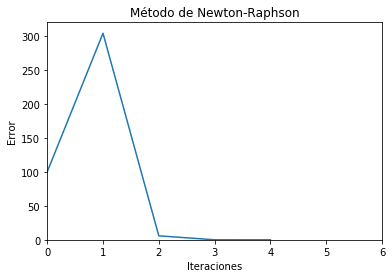

In [33]:
plt.plot(Ge)
plt.title('Método de Newton-Raphson')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.axis([0, 6, 0, 320])
plt.show()

### <font color='blue'>EJEMPLO 2.- CÁLCULO DE LA POTENCIA DE UNA  BOMBA.</font>

## _En un sistema de riego localizado de alta frecuencia para un cultivo de cítricos se requiere mover un caudal de agua de 42 L/s desde el sitio de toma a la planta de fertirrigación. Estos dos puntos se encuentran separados por una distancia de 970m, estando la planta 16m por encima de la toma. Si existe una tubería de PVC (ks = 1.5x10-6 m) de 150mm de diámetro nominal, con un coeficiente global de pérdidas menores de 9.4, ¿Cúal es la altura piezométrica que ddebe ser suministrada por la bomba en el sitio de toma?, ¿Cúal es la potencia?. Para el agua u = 1.14x10-6 m2/s y p = 999.1 kg/m3._

### SOLUCIÓN.

### <font color='green'>a) Datos:</font>

In [34]:
Q = 42            # Caudal que se pretende mover, L/s.
d = 150           # Diametro de la tuberia, mm.
ks = 1.5*10**-6   # Rugosidad absoluta de la tuberia de PVC, mts.
km = 9.4          # Coeficiente de pérdidas menores.
L = 970           # Longitud de la tubería, mts.
u = 1.14*10**-6   # Viscocidad cinemática, m2/s.
p = 999.1         # Densidad del agua, kg/m3
z2 = 16           # Diferencia de alturas entre la planta y la toma, mts.

### <font color='green'>b) Diagrama de Flujo:</font>

![DiagFlujoBomba](https://user-images.githubusercontent.com/47722525/78464215-afd5e980-76a3-11ea-9656-6f7a269b22cb.png)

### <font color='green'>c) Programación:</font>

In [35]:
# Librerias.
import math
import matplotlib.pyplot as plt

# Función.
def PotenciaRequerida(Q,L,d,ks,km,p,u,z2,n):
    '''
    Devuelve la potencia necesaria para mover un caudal determinado a través de una tubería.
    
    Este tipo de problema se plantea cuando se quiere utilizar una tubería existente para mover
    un cierto caudal demandado y se desea conocer la bomba que debe ser colocada o la diferencia
    de nivel entre la entrada y la salida de la tubería.

    Inputs:
    Q  -- Caudal (m^3/s).
    L  -- Longitud de la tubería (mts). 
    d  -- Diámetro de la tubería (mts).
    ks -- Rugosidad Absoluta del material (mts).
    km -- Coeficiente de Pérdidas Menores.
    p  -- Densidad del fluido (kg/m^3).
    u  -- Viscocidad cinemática (m^2/s).
    z2 -- Cota topográfica (mts).
    n  -- Eficiencia de la bomba.
    
    Output:
    P = Potencia necesaria para mover un caudal determinado a través de una tubería (Kilo-watts).

    Programó:
    Ing. Josue Emmanuel Cruz Barragan
    '''
    
    g = 9.807
    
    def Reynolds(Q,d,u):
        V = Velocidad(Q,d) 
        return V*d/u
    
    def Velocidad(Q,d):
        return Q/(0.25*math.pi*(d**2))
    
    def Suma_hm(V,km,g):
        return km*(V**2)/(2*g)
    
    def Colebrook_White(Re,ks,d):
        tol = 0.001
        error = 100

        def Log(var):
            return math.log10(var)

        def Ln(var):
            return math.log(var)

        def Fricc(Re,ks,d,f):
            a = ks/(3.7*d)
            b = 2.51*f/Re

            return -2*Log(a+b)-f

        def Fricc_p(Re,ks,d,f):
            a = -2/Ln(10)
            b = ks/(3.7*d)
            c = 2.51*f/Re
            d = 2.51/Re
            return (a*d/(b+c))-1
        
        if Re >= 2200:
            # Aplicación del método de Newton-Raphson
            Gerr = [100]
            while error >= tol:
                if error == 100:
                    x1 = 1/math.sqrt(0.001)
                Fxp = Fricc_p(Re,ks,d,x1)
                Fx = Fricc(Re,ks,d,x1)
                x2 = x1 - (Fx/Fxp)
                error = abs((x2-x1)/x2)*100
                Gerr.append(error)
                x1 = x2
            return 1/(x1**2),Gerr
        else:
            return 64/Re

            
    def Perd_friccion(f,L,V,d,g):
        return f*L*(V**2)/(2*g*d)
            
    def H_tot(z2,hf,Shm):
        return z2+hf+Shm 
    
    Re = Reynolds(Q,d,u)
    V = Velocidad(Q,d)
    Shm = Suma_hm(V,km,g)
    f,Ge = Colebrook_White(Re,ks,d)
    hf = Perd_friccion(f,L,V,d,g)
    H = H_tot(z2,hf,Shm)
            
    return p*Q*g*H/(n*10),H


### <font color='green'>d) Resultado para una bomba con 100% de eficiencia:</font>

In [36]:
''' Sustituyendo '''
[P,H] = PotenciaRequerida(0.042,970,0.15,1.5*10**-6,9.4,999.1,1.14*10**-6,16,100)
print("La altura piezométrica que debe suministrar la bomba en el sitio de toma es de {} metros".format(round(H,2)))
print("Para una eficiencia del 100% se requiere una potencia de {} kW".format(round(P,2)))

La altura piezométrica que debe suministrar la bomba en el sitio de toma es de 45.63 metros
Para una eficiencia del 100% se requiere una potencia de 18.78 kW


### <font color='green'>e) Gráfica Potencia-Eficiencia</font>

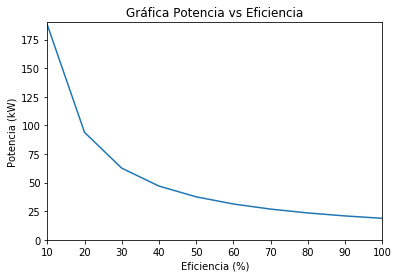

In [37]:
e = [10,20,30,40,50,60,70,80,90,100]
p = []
for i in range(len(e)):
    p.append(PotenciaRequerida(0.042,970,0.15,1.5*10**-6,9.4,999.1,1.14*10**-6,16,e[i])[0])
plt.plot(e,p)
plt.title('Gráfica Potencia vs Eficiencia')
plt.xlabel('Eficiencia (%)')
plt.ylabel('Potencia (kW)')
plt.axis([10, 100, 0, 190])
plt.show()

### En la gráfica se observa como mientras mejor sea la eficiencia de la bomba menor potencia se necesita para mover el caudal